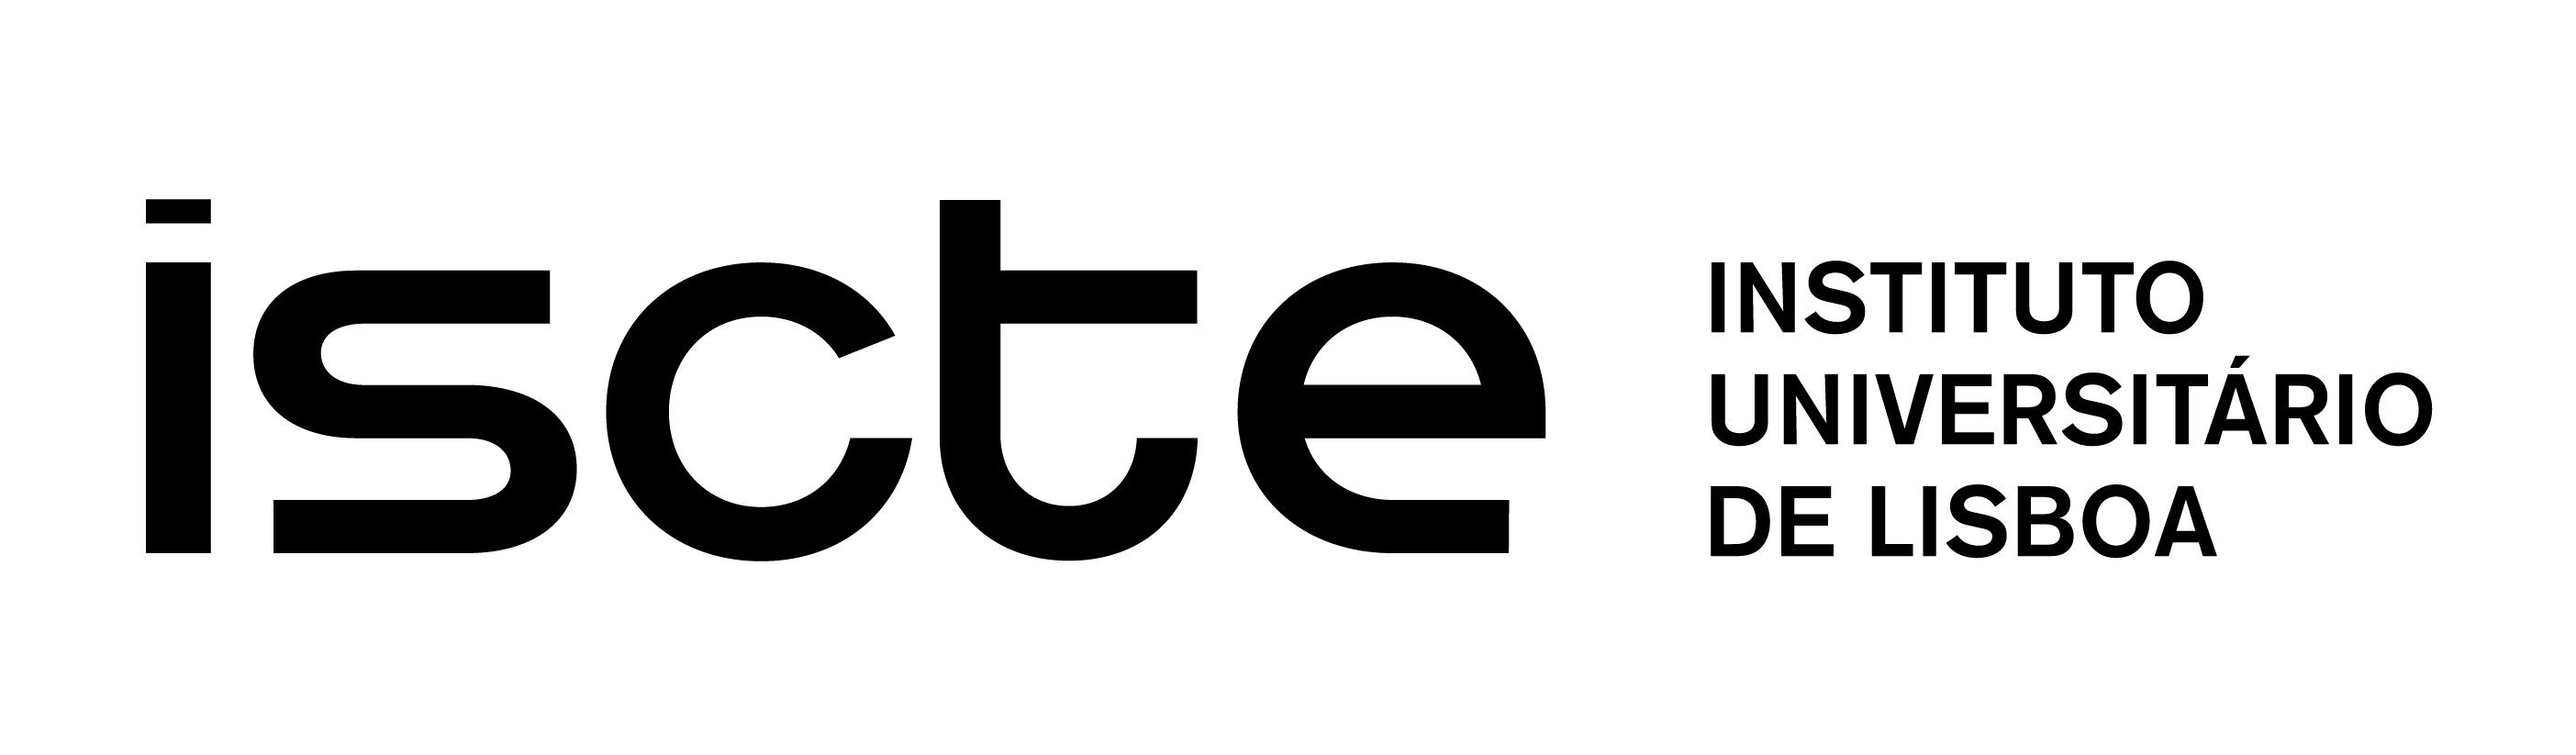
<p style="font-size: xx-large; font-weight:bold;">Projeto-Final-EDA</p>

>**Unidade curricular | Course Unit** Estrutura de Dados e Algoritmos | Data Structures and Algorithms
>
>**Professor** Luis Ramada Pereira
>
>**Curso|Course** LCD-PL -- **Ano letivo|Year** 2019/2020
>
>**Autores/Authors**
>
>     | Catarina Castanheira | nº 92478 |
>     | João Martins         | nº 93259 |
>     | Joel Paula           | nº 93392 |
>
>
>27-05-2020

# Introdução

Pretende-se analisar um grafo e determinar qual o número mínimo de arestas a remover, se quisermos separar o grafo em duas partes desconexas e cada uma de uma dimensão significativa.

Este problema é típico na análise de robustez de redes, como redes elétricas ou redes de transportes, quer numa perspetiva de “ataque“, quer numa perspetiva de defesa da rede. Também pode ser usado para análise de densidade.

Dividindo a rede em dois, quanto maior o número de cortes necessários em relação ao produto do número de nós dos dois clusters resultantes, maior a robustez.

Para este exercício específico usamos a conhecida rede de metro de Londres (_London Tube_), que possui 302 estações.

A partição de grafos é um problema complexo, de complexidade exponencial ou NP-Completo (Demmel, 2009). O caso da divisão em dois de um grafo de N vértices apresenta $\frac{N!}{((N/2)!)^2}$ possibilidades (Demmel, 2009). É um número que tende rapidamente para $+\infty$! Para o caso específico das 302 estações, é um número com mais de 600 dígitos!

Portanto, este é o tipo de problema que exige um algoritmo.

Partimos de Gonina, Ray e Su (2020), conforme sugerido pelo enunciado do trabalho, para analisar os diversos algoritmos disponíveis. Considerou-se também que este é um problema pequeno, com um grafo sem simetrias e com relativa dispersão geográfica uniforme na zona central. Acabámos por selecionar o método sugerido de espectro de bisseção (_Spectral Bisection_), pela sua qualidade e simplicidade de implementação para o problema analisado.

O objectivo é obter o mínimo número de cortes ou a mínima "ratio cut partition".

# Metodologia

O objectivo é minimizar a função de _Fiedler_, definida através de: $$f = \frac{c}{\mid G1\mid * \mid G2\mid}$$
Em que $\mid G1\mid$ e $\mid G2\mid$ correspondem ao número de vértices do grafos obtidos pela bissecção do grafo inicial e $c$ corresponde ao número de cortes necessários para separar ambos os grafos. É fácil perceber que quanto mais equilibrados forem os dois subgrafos maior será o denominador desta fração, o que é inversamente propocional ao rácio de corte. Embora o rácio seja diretamente proporcional ao número de cortes necessários à bissecção, estes teriam de ser em grande número para o valor se aproximar de 1.

Explicação do algoritmo selecionado:

De modo a fazer uma partição do grafo, em que o número de vértices é o mais possível equilibrado entre os dois subgrafos, minimizando o número de arestas que conectam os dois, recorremos ao algoritmo _Spectral Bisection_, desenvolvida por Fiedler em 1970. Este algoritmo é baseado na computação dos vectores próprios sobre a matriz Laplaciana que representa o grafo.

No entanto este algoritmo só nos permite chegar a aproximações de partições de grafos ótimas (não é possível encontrar a bissecção ideal porque é um _Problema NP-Completo_, ou seja, nenhum algoritmo de solução eficiente foi encontrado para a bissecção ideal).

Método (segundo Gonina, Ray e Su 2020):

 - Abrir o documento, importar o ficheiro;

 - Construir as classes / estruturas de dados para armazenar a informação da rede de metropolitano de Londres, em que vértices = estações, arestas = ligações entre pares de estações; São definidas as classes Grafo, Vértice, Aresta, Estação;

 - Implementação do algoritmo de Bissecção Espectral começa com a construção de uma matriz Laplaciana para representar o grafo (aqui a matriz é construída directamente, sem recorrer a operações de soma / subtracção de matrizes e sem utilização de matriz de adjacência e de matriz diagonal;

 - Construir uma matriz Nula 302 x 302 (correspondente ao número de estações);

 - Inserir, por meio de ciclos que atravessam a matriz o valor -1 nos índices ij (que representam a existência de uma ligação entre a estação i e a estação j); inserir em cada índice i=j o grau do vértice, que simboliza o número de ligações a essa estação; os restantes elementos mantêm o valor zero;

 - Determinar o segundo valor próprio da matriz Laplaciana e de seguida obter o vector próprio correspondente;

 - Construir dois grafos para armazenarem cada conjunto de vértices consequentes da partição do original;

 - Para cada elemento do vector próprio (que corresponde por sua vez a um vértice específico), se esse elemento for menor que zero, o vértice correspondente será inserido no subgrafo 1, se for maior que zero o vértice será inserido no subgrafo 2;

 - Para calcular o corte mínimo do grafo: teremos de determinar se existiu um corte nas arestas que ligam cada duas estações (vértices); para isto, basta verificar se os vértices incidentes se encontram cada um num subgrafo diferente. Se sim, então estamos perante um corte no grafo. Contar o número de cortes.


# Execução - Construindo o algoritmo

## Livrarias usadas
Neste trabalho foram utilizadas as seguintes livrarias de python:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from haversine import haversine, Unit
from collections import namedtuple

O Pandas é usado para importação de dados.
O Numpy é usado para tratamento de matrizes.
O Matplotlib para representação gráfica dos grafos.
Enum, para criar classes de enumeração, que nos simplificam a utilização e leitura do código.
Usámos a livraria Haversine, para evitar ter de contruir a função de cálculo de distância entre dois pontos na superficio do globo terrestre.


## Ficheiros de dados 
Os ficheiros de dados utilizados:

* [`LondonTube/london.stations.txt`](LondonTube/london.stations.txt) - contém os dados das estações
* [`LondonTube/london.connections.txt`](LondonTube/london.connections.txt) - contém os dados das ligações entre estações

Como primeiro passo, lêem-se os ficheiros, para ficar claro que dados estão ou não disponíveis.

In [2]:
df_stations = pd.read_csv("LondonTube/london.stations.txt")
df_stations.head()

,id,latitude,longitude,name,display_name,zone,total_lines,rail
0,1,51.5028,-0.2801,Acton Town,ActonTown,3.0,2,0
1,2,51.5143,-0.0755,Aldgate,NaN,1.0,2,0
2,3,51.5154,-0.0726,Aldgate East,AldgateEast,1.0,2,0
3,4,51.5107,-0.0130,All Saints,AllSaints,2.0,1,0
4,5,51.5407,-0.2997,Alperton,NaN,4.0,1,0


In [3]:
df_connections = pd.read_csv("LondonTube/london.connections.txt")
df_connections.head()

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2


## A classe de grafo

Para implementação do grafo, usámos uma estrutura em mapas de adjacência. A classe mantém um dicionário de vértices e cada vértice contêm um dicionário de pares vértices adjacentes / arestas. Usámos este tipo de implementação por ter uma boa eficiência na ocupação de memória, com baixo grau de complexidade. Adicionalmente, facilita a manipulação necessária durante a execução do algoritmo. A implementação é apenas a suficiente para a execução deste projeto.

Para além da classe `Graph`, que implementa o grafo, existem as classes auxiliáres `Vertex` e `Edge`, que implementam um vértice e uma aresta, respetivamente.
Estas classes implementam os métodos mágicos `__str()__` e `__repr()__`, para facilitarem o debug rápido de estados do grafo (e do programa).

In [4]:
class Vertex:
    def __init__(self, name=None):
        self.__name = name

    @property
    def name(self):
        return self.__name

    def __str__(self):
        return f"{self.__name}"

    def __repr__(self):
        return str(self)


class Edge:
    def __init__(self, origin, destination, name=None):
        self.__name = name
        self.__vertices = (origin, destination)

    @property
    def name(self):
        return self.__name

    @property
    def origin(self):
        return self.__vertices[0]

    @property
    def destination(self):
        return self.__vertices[1]

    def endpoints(self):
        return self.__vertices

    def opposite(self, v):
        return next(i for i in self.__vertices if i is not v)

    def __str__(self):
        return f"{self.__name if self.__name else ''}: ({self.__vertices[0].name} -- {self.__vertices[1].name})"

    def __repr__(self):
        return str(self)


class Graph:
    def __init__(self):
        self.__vertices = {}

    def insert_vertex(self, v):
        self.__vertices[v] = {}

    def vertices(self):
        return self.__vertices.keys()

    def vertex_count(self):
        return len(self.__vertices)

    def insert_edge(self, e):
        self.__vertices[e.origin][e.destination] = e
        self.__vertices[e.destination][e.origin] = e

    def edges(self):
        return {
            edge
            for children in self.__vertices.values()
            for edge in children.values()
        }

    def edge_count(self):
        return len(self.edges())

    def get_edge(self, u, v):
        res = None
        if u in self.__vertices:
            if v in self.__vertices[u]:
                res = self.__vertices[u][v]
        return res

    def degree(self, v):
        # print(self.__vertices[v].keys())
        return len(self.__vertices[v].keys())

    def remove_vertex(self, v):
        # remove connections to this vertex
        for o in self.__vertices[v]:
            del self.__vertices[o][v]
        del self.__vertices[v]

    def remove_edge(self, e):
        del self.__vertices[e.origin][e.destination]
        del self.__vertices[e.destination][e.origin]

Para representação de um vértice do tipo estação foi criada uma classe `Station` que estende a classe `Vertex`, acrescentando as características necessárias neste caso: id, latitude e longitude da estação.

In [5]:
class Station(Vertex):
    def __init__(self, id, name, latitude, longitude):
        super().__init__(name=name)
        self.__id = id
        self.__latitude = latitude
        self.__longitude = longitude

    @property
    def id(self):
        return self.__id

    @property
    def latitude(self):
        return self.__latitude

    @property
    def longitude(self):
        return self.__longitude
    
    def geo_ref(self):
        return (self.__latitude, self.__longitude)

    def __str__(self):
        return f"[{self.id}] {self.name} ({self.latitude}, {self.longitude})"

    def __repr__(self):
        return str(self)

## Criando o grafo
A intenção é ler os ficheiros de dados de estações e suas conexões, e com eles criar um grafo, para facilitar a sua análise posterior.
Como estrutura auxiliar, usamos um dicionário, onde vão sendo colocadas as estações criadas a partir dos dados, para facilitar posteriormente a criação das arestas / conexões.

De forma análoga, é usado um dicionário para agregar as arestas criadas a partir dos ficheiros de dados, como forma expedita de garantir a eliminação de conexões "repetidas", tal como vêm nos ficheiros de dados. Só depois de colocadas as conexões no dicionário auxiliar é que são adicionadas ao grafo.

In [6]:
gr = Graph()

train_stations = {}  # TODO Use BST
for ts in df_stations.itertuples():
    s = Station(id=ts.id,
                name=ts.name,
                latitude=ts.latitude,
                longitude=ts.longitude)
    gr.insert_vertex(s)
    train_stations[s.id] = s

connections = {}
for cn in df_connections.itertuples():
    key1 = (cn.station1, cn.station2)
    key2 = (cn.station2, cn.station1)
    if key1 not in connections.keys() and key2 not in connections.keys():
        c = Edge(train_stations[cn.station1], train_stations[cn.station2])
        connections[key1] = c

for e in connections.values():
    gr.insert_edge(e)

print("Stations: ", gr.vertex_count())
print("Connections: ", gr.edge_count())

Stations:  302
Connections:  349


Para facilitar a apreensão do trabalho executado, foi incluida uma rotina de visualização:

In [7]:
plt.rcParams['figure.dpi'] = 150

def plot_edges(lst, color="xkcd:royal blue", marker="o", markersize=1, linewidthwidth=0.5, showgraph=False):
    for e in lst:
        xs = [e.origin.longitude, e.destination.longitude]
        ys = [e.origin.latitude, e.destination.latitude]
        plt.plot(xs, ys, c=color, marker=marker, markersize=markersize, linewidth=linewidthwidth)

    if showgraph:
        plt.axis('off')
        plt.show()

Esta rotina permite visualizar o mapa a partir da lista de arestas. Dá a possibilidade de alterar a cor das linhas e pontos usados, a sua espessura e o tipo de marcador usado para as estações. O parâmetro `showgraph` permite chamar repetidas vezes a rotina (por exemplo, para adicionar vários grafos ao mesmo mapa) e controlar quando finalmente o resultado é apresentado.

Utilizando para visualizar o grafo da rede inteira:

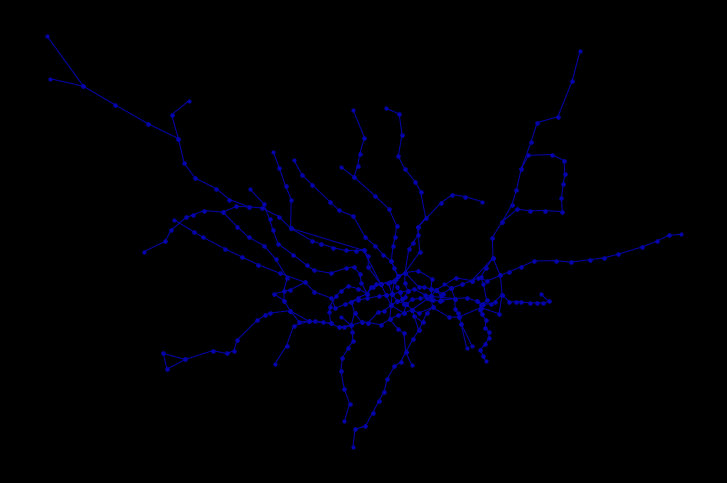

In [8]:
plot_edges(gr.edges(), showgraph=True)

O próximo passo é determinar a matriz Laplaciana e obter o segundo vector próprio.

A determinação da matriz laplaciana é simples: construir uma matriz simétrica com o número de estações/vértices, em que nas interceções de duas estações que estão ligados está o valor `-1` e nas interceções da estação consigo própria está o grau da estação (o número de arestas incidentes ou de conexões).
É usada uma lista auxiliar das estações / vértices, para poder referir-se à estação pela sua ordem, tal como na matriz.

Uma vez construida a matriz, o módulo `linalg` da livraria Numpy providencia a função `eig()` que devolve um array de "_eigenvalues_" (valores próprios ou característicos) e outro dos correspondentes vetores próprios ("_eigenvectors_"). Uma vez obtidos, é necessário descobrir qual é o segundo valor próprio, ordenando o array por ordem crescente. Ao obter a posição do segundo valor próprio fica determinado qual é o correspondente vetor próprio, que será usado na sequência do algoritmo para determinar o corte do grafo em dois.

In [9]:
m_L = np.zeros([gr.vertex_count(), gr.vertex_count()], int)
vertices = list(gr.vertices())

for i in range(m_L.shape[0]):
    for j in range(m_L.shape[1]):
        if i == j:
            m_L[i, j] = gr.degree(vertices[i])
        elif gr.get_edge(vertices[i], vertices[j]):
            m_L[i, j] = -1

# Get EigenVector
eigenvalues, v = np.linalg.eig(m_L)
eigen_index = np.argsort(eigenvalues)[1]
ev2nd = v[:, eigen_index]

Seguindo na aplicação do algoritmo, usamos o vetor próprio para separar o grafo em dois, resultado daí os grafos _G1_ e _G2_. O critério de separação é o valor do vetor próprio para a posição daquela estação / vértice ser ou não inferior a zero.

In [10]:
g1 = Graph()
g2 = Graph()

for i in range(ev2nd.size):
    if ev2nd[i] < 0:
        g1.insert_vertex(vertices[i])
    else:
        g2.insert_vertex(vertices[i])

g1_count = g1.vertex_count()
g2_count = g2.vertex_count()

print("G1: ", g1_count, "stations")
print("G2: ", g2_count, "stations")

G1:  130 stations
G2:  172 stations


Obtemos dois grafos separados: G1 contendo 130 vértices / estações  e G2 contendo 172 vértices / estações.

O próximo passo é verificar o número de cortes que são efetuados para esta divisão do grafo inicial. Para isso são tomados todas as arestas / conexões do grafo inicial e é verificado se ambos os vértices incidentes estão dentro do mesmo _cluster_ após a divisão (G1 ou G2) - caso em que a aresta é imediatamente associados a esse grafo - ou se os seus vértices incidentes estão em _clusters_ separados - caso em que é considerada uma aresta de corte.

In [11]:
# Edges with one vertex/station in g1 and another one in g2
e_to_cut = []
for e in gr.edges():
    if all(ver in g1.vertices() for ver in e.endpoints()):
        g1.insert_edge(e)
    elif all(ver in g2.vertices() for ver in e.endpoints()):
        g2.insert_edge(e)
    else:
        e_to_cut.append(e)

print("Number of connections in G1:", g1.edge_count())
print("Number of connections in G2:", g2.edge_count())
print("Number of cuts:", len(e_to_cut))
print("Minimum Cut Ratio:", len(e_to_cut) / (g1_count * g2_count))


Number of connections in G1: 145
Number of connections in G2: 196
Number of cuts: 8
Minimum Cut Ratio: 0.00035778175313059033


Visto que construimos os grafos das redes separadas, podemos visualizar a rede e os cortes. Usamo a seguir o azul para G1, o verde para G2 e o vermelho para os cortes.

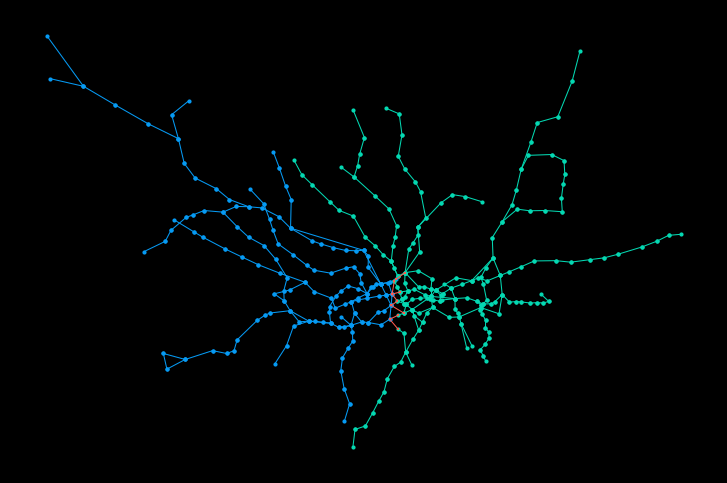

In [12]:
plot_edges(g1.edges(), color="xkcd:azure")
plot_edges(g2.edges(), color="xkcd:aquamarine")
plot_edges(e_to_cut, color="xkcd:coral", marker="+", markersize=0.9, showgraph=True)

Os cortes efetuados:

In [13]:
for e in e_to_cut:
    print(e)

: (Green Park -- Westminster)
: (Oxford Circus -- Tottenham Court Road)
: (Euston Square -- King's Cross St. Pancras)
: (St. James's Park -- Victoria)
: (Green Park -- Picadilly Circus)
: (Oxford Circus -- Warren Street)
: (Pimlico -- Victoria)
: (Oxford Circus -- Picadilly Circus)


# Resultados

Através deste algoritmo conseguimos obter duas redes completamente ligadas, com apenas 8 cortes. O resultado pode ser verificado no mapa da rede, onde estão assinalados os cortes efetuados.
![tube-map.gif - mapa da rede de metro de Londres com os cortes assinalados](tube-map.gif)
Nota: a rede de metro não inclui as linhas de comboio representadas a duas cores no mapa.

Observando o _Minimum Cut Ratio_ de 0.0004, podemos concluir que a robustez da rede de metro de Londres é muito baixa, uma vez que necessita de apenas 8 cortes para a separar em dois grandes _clusters_, impedindo a circulação de passageiros entre duas metades da rede metropolitana.

# Parte 2

Novo grafo, direcionado

In [14]:
class DiGraph:
    def __init__(self, directed=False):
        self.__directed = directed
        self.__vertices_out = {}
        if directed:
            self.__vertices_in = {}
        else:
            self.__vertices_in = self.__vertices_out

    def insert_vertex(self, v):
        self.__vertices_out[v] = {}
        if self.__directed:
            self.__vertices_in[v] = {}

    def vertices(self):
        return self.__vertices_out.keys()

    def vertex_count(self):
        return len(self.__vertices_out)

    def insert_edge(self, e):
        self.__vertices_out[e.origin][e.destination] = e
        self.__vertices_in[e.destination][e.origin] = e

    def edges(self):
        return {
            edge
            for children in self.__vertices_out.values()
            for edge in children.values()
        }

    def edge_count(self):
        return len(self.edges())

    def get_edge(self, origin, destination):
        res = None
        if origin in self.__vertices_out:
            if destination in self.__vertices_out[origin]:
                res = self.__vertices_out[origin][destination]
        return res

    def get_incident_edges(self, v, outgoing=True):
        return self.__vertices_out[v].values() if outgoing else self.__vertices_in[v].values()

    def degree(self, v):
        # print(self.__vertices[v].keys())
        return len(self.__vertices_out[v].keys())

    def remove_vertex(self, v):
        # remove edges from this vertex
        for o in self.__vertices_out[v]:
            del self.__vertices_out[o][v]
        for o in self.__vertices_in[v]:
            del self.__vertices_in[o][v]
        del self.__vertices_out[v]
        del self.__vertices_in[v]

    def remove_edge(self, e):
        del self.__vertices_out[e.origin][e.destination]
        del self.__vertices_in[e.destination][e.origin]

Criamos também uma nova classe de aresta entre os vértices/estações, que herda da anterior classe `Edge`, mas que inclui também os componentes que serão considerados para o peso - distância, tempos e linhas:

In [29]:
class peak_type(Enum):
    OFF_PEAK = 1
    AM_PEAK = 2
    INTER_PEAK = 3

class Connection(Edge):
    def __init__(self, origin, destination, distance_km, off_peak_mins, am_peak_mins, inter_peak_mins, line, name=None):
        super().__init__(origin=origin, destination=destination, name=name)
        self.distance_km = distance_km
        self.__times = {peak_type.OFF_PEAK: off_peak_mins, 
                        peak_type.AM_PEAK: am_peak_mins, 
                        peak_type.INTER_PEAK: inter_peak_mins}
        self.__lines = {line}

    @property
    def lines(self):
        return self.__lines

    def add_line(self, line):
        self.__lines.add(line)

    def get_time(self, peak):
        return self.__times[peak]

    def set_time(self, value, peak):
        self.__times[peak] = value

    def __str__(self):
        return f"{self.__name if self.__name else ''}: ({self.__vertices[0].name} -- {self.__vertices[1].name}) distance: {self.__distance}km"

    def __repr__(self):
        return str(self)

Para além dos dois ficheiros usados na Parte 1 (estações e conexões entre estações), vamos usar também:
* [`LondonTube/interstation v2.csv`](LondonTube/interstation v2.csv) - distâncias e tempos de ligação entre estações, por cada sentido e por cada linha
* [`LondonTube/london.lines.txt`](LondonTube/london.lines.txt) - as linhas de metropolitano

Como primeiro passo, lêem-se os ficheiros, para ficar claro que dados estão ou não disponíveis.

In [30]:
df_interstations = pd.read_csv("LondonTube/interstation v2.csv")
print("Distâncias e tempos entre estações:", len(df_interstations.index))
df_interstations.head()

Distâncias e tempos entre estações: 743


,Line,From Station Id,To Station Id,Distance (Kms),Off Peak Running Time (mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,1,114,140,1.74,2.23,2.50,2.50
1,1,140,237,1.40,1.88,2.00,2.00
2,1,237,185,0.90,1.50,1.50,1.50
3,1,185,281,1.27,1.92,2.06,2.06
4,1,281,246,1.71,2.23,3.13,3.13


In [31]:
df_lines = pd.read_csv("LondonTube/london.lines.txt")
print("Linhas:", len(df_lines.index))
df_lines.head()

Linhas: 13


,line,name,colour,stripe
0,1,Bakerloo Line,AE6017,NaN
1,3,Circle Line,FFE02B,NaN
2,6,Hammersmith & City Line,F491A8,NaN
3,7,Jubilee Line,949699,NaN
4,11,Victoria Line,0A9CDA,NaN


Começamos por ler as várias linhas de metro para um dicionário, pois serão de utilidade no futuro.

In [32]:
TrainLine = namedtuple("TrainLine", "id, name, color, stripe_color")
london_lines = {}
for l in df_lines.itertuples():
    london_lines[l.line] = TrainLine(l.line, l.name, l.colour, l.stripe)
print(london_lines)

{1: TrainLine(id=1, name='Bakerloo Line', color='AE6017', stripe_color=nan), 3: TrainLine(id=3, name='Circle Line', color='FFE02B', stripe_color=nan), 6: TrainLine(id=6, name='Hammersmith & City Line', color='F491A8', stripe_color=nan), 7: TrainLine(id=7, name='Jubilee Line', color='949699', stripe_color=nan), 11: TrainLine(id=11, name='Victoria Line', color='0A9CDA', stripe_color=nan), 2: TrainLine(id=2, name='Central Line', color='F15B2E', stripe_color=nan), 4: TrainLine(id=4, name='District Line', color='00A166', stripe_color=nan), 5: TrainLine(id=5, name='East London Line', color='FBAE34', stripe_color=nan), 8: TrainLine(id=8, name='Metropolitan Line', color='91005A', stripe_color=nan), 9: TrainLine(id=9, name='Northern Line', color='000000', stripe_color=nan), 10: TrainLine(id=10, name='Piccadilly Line', color='094FA3', stripe_color=nan), 12: TrainLine(id=12, name='Waterloo & City Line', color='88D0C4', stripe_color=nan), 13: TrainLine(id=13, name='Docklands Light Railway', color=

De seguida lemos as ligações entre as estações, por linha, colocando-as num dicionário, de forma a facilitar a sua utilização quando formos adicionar as ligações entre estações.

In [33]:
interstations = {} # {(from_station, to_station): {line: ConnectionWeights}}

ConnectionWeights = namedtuple("ConnectionWeights", "line, from_station, to_station, distance_km, off_peak_mins, am_peak_mins, inter_peak_mins")
for line in df_interstations.itertuples():
    key = (line[1], line[2])
    if key not in interstations.keys():
        interstations[(line[1], line[2])] = {}
    interstations[(line[1], line[2])][line[0]] = ConnectionWeights(line[0], line[1], line[2],line[3], line[4], line[5], line[6])

print("Tempos e distâncias de ligação lidos:", sum(len(it.keys()) for it in interstations.values()))

Tempos e distâncias de ligação lidos: 743


Criar o grafo pesado e dirigido:

In [35]:
weighted_gr = DiGraph()

def get_weights(from_ts, to_ts, line, use_oposite_direction=False, calculate_weights=False):
    """Get the weights (time and distance) for a line from station `from_ts` to 
    station `to_ts`
        : use_oposite_direction (bool): When interstation weights are not found 
    from_ts` to `to_ts`, then we try to get from `to_ts`to `from_ts`.
        : calculate_weights (bool): When interstation weights are not found from 
    `from_ts` to `to_ts` (and from `to_ts`to `from_ts`, depending on 
    use_oposite_direction), calculate the direct distance and assume a time based 
    on 30km/h speed.
    """
    weights = None
    key = (from_ts, to_ts)
    if key in interstations.keys():
        if line in interstations[key].keys():
            weights = interstations[key][line]
        else:
            weights = next(iter(interstations[key].values()))
    elif use_oposite_direction and (to_ts, from_ts) in interstations.keys():
        key = (to_ts, from_ts)
        if line in interstations[key].keys():
            weights = interstations[key][line]
        else:
            weights = next(iter(interstations[key].values()))
    elif calculate_weights:
        distance_kms = haversine(train_stations[from_ts].geo_ref(), train_stations[to_ts].geo_ref())
        # assume 30km/h speed
        time_mins = distance_kms * 2 # distance x 60mins / 30km
        weights = ConnectionWeights(line, from_ts, to_ts, distance_kms, time_mins, time_mins, time_mins)
    return weights

# read train stations    
train_stations = {}  # TODO Use BST
for ts in df_stations.itertuples():
    s = Station(id=ts.id,
                name=ts.name,
                latitude=ts.latitude,
                longitude=ts.longitude)
    weighted_gr.insert_vertex(s)
    train_stations[s.id] = s

# now read all the connections and create the edges for these connections
for cn in df_connections.itertuples():
    weights = get_weights(cn.station1, cn.station2, cn.line)
    c = weighted_gr.get_edge(train_stations[cn.station1], train_stations[cn.station2])
    if c:
        # connection already exists - add the line
        c.add_line(cn.line)
    elif weights:
        c = Connection(train_stations[cn.station1], train_stations[cn.station2], weights.distance_km,
            weights.off_peak_mins, weights.am_peak_mins, weights.inter_peak_mins, cn.line)
        weighted_gr.insert_edge(c)
    else:
        c = Connection(train_stations[cn.station1], train_stations[cn.station2], 0, 0, 0, 0, cn.line)
        weighted_gr.insert_edge(c)

# calculate missing weights (distance + times)
for cn in weighted_gr.edges():
    if cn.distance_km == 0:
        weights = get_weights(cn.origin.id, cn.destination.id, 0, True, True)
        cn.distance_km = weights.distance_km
        cn.set_time(peak_type.AM_PEAK, weights.am_peak_mins)
        cn.set_time(peak_type.INTER_PEAK, weights.inter_peak_mins)
        cn.set_time(peak_type.OFF_PEAK, weights.off_peak_mins)

print("Stations: ", weighted_gr.vertex_count())
print("Connections: ", weighted_gr.edge_count())

Stations:  302
Connections:  349


Precisamos de um Heap para executar o algoritmo de Dijkstra:

In [21]:
class BinaryHeap(object):
    class _Node(object):
        def __init__(self, key, element):
            self._element = element
            self._key = key
        def __str__(self):
            return self._key
        def __repr__(self):
                return str(self)


    def __init__(self):
        self._heap = []

    def __len__(self):
        return len(self._heap)
    
    @staticmethod
    def _parent(position):
        return (position - 1)//2

    @staticmethod
    def _left(position):
        return 2 * position + 1
    
    @staticmethod
    def _right(position):
        return 2 * position + 2
    
    def is_empty(self):
        return len(self._heap) == 0
    
    def inspect_first(self):
        if self.is_empty():
            return None
        return self._heap[0]._element

    def add(self, key, element):
        node = self._Node(key, element)
        self._heap.append(node)
        self._bubble_up(len(self._heap)-1)

    def first(self):
        res = self.inspect_first()
        self._heap[0] = self._heap.pop()
        self._bubble_down(0)
        return res
    
    def _bubble_up(self, position):
        if position <= 0 :
            return
        parent_pos = self._parent(position)
        parent = self._heap[parent_pos]
        node = self._heap[position]
        if parent._key > node._key:
            self._swap(position, parent_pos)
            self._bubble_up(parent_pos)
    
    def _swap(self, a, b):
        o = self._heap[a]
        self._heap[a] = self._heap[b]
        self._heap[b] = o
    
    def _exists(self, position):
        return len(self._heap) > position

    def _bubble_down(self, position):
        left = self._left(position)
        right = self._right(position)
        # no left node = no right node = nothing to do here
        if not self._exists(left):
            return
        # print("Exists Right: ", self._exists(right), right)
        # print("Exists Left:", self._exists(left), left)
        if self._exists(right) and self._heap[left]._key > self._heap[right]._key:
            new_pos = right
        else:
            new_pos = left
        if self._heap[position]._key > self._heap[new_pos]._key:
            self._swap(position, new_pos)
            self._bubble_down(new_pos)


Próximo passo: pesquisar distancia entre Amersham (id 6) e Wimbledon (id 299).

Documentar o uso da funcionalidade de caminho mais curto, incuíndo no documento o resultado da pesquisa com Amersham e Wimbledon como
estações terminais.

In [22]:
def shortest_path(gr, origin, destination):
    cloud = {}
    priority_queue = BinaryHeap()
    distances = {}
    priority_queue.add(0, origin)

    while not priority_queue.is_empty():
        v = priority_queue.first()
        cloud[v]



# Bibliografia
Demmel, J. (2009). CS267 lecture 13 – Graph Partitioning. Obtido em 25 de Maio de 2020, de U.C. Berkeley CS267/EngC233: https://people.eecs.berkeley.edu/~demmel/cs267_Spr09/Lectures/lecture13_partition_jwd09.ppt

Gonina, K., Ray, S., & Su, B.-Y. (2020). _Graph Partitioning_. Obtido em 25 de Maio de 2020, de Berkeley Our Pattern Language: https://patterns.eecs.berkeley.edu/?page_id=571

Kabelíková, P. (2006). _Graph Partitioning Using Spectral Methods_. (Tese). VSB - Technical University of Ostrava, República Checa. Obtido em 25 de Maio de 2020: https://pdfs.semanticscholar.org/ab34/1258fbab7b2e9a719c6bbeb96fc204356a82.pdf

Wikipédia. (2019). _Partição de grafos_. Obtido de Wikipédia: https://pt.wikipedia.org/wiki/Parti%C3%A7%C3%A3o_de_grafos